In [1]:
import os
os.environ["OMP_NUM_THREADS"] = '1'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
import seaborn as sns

housing = pd.read_csv("~/Documents/NYCDSA/Third Project/ML_Ames_Housing/data/Ames_Housing_Price_Data.csv", index_col=0)

housing_numeric = pd.read_pickle("housing_numeric.pkl")
housing_factor = pd.read_pickle("housing_factor.pkl")
housing_numeric['TotalSF'] = housing_numeric['TotalBsmtSF'] + housing_numeric['1stFlrSF'] + housing_numeric['2ndFlrSF']
housing_numeric['TotalBath'] = housing_numeric['BsmtFullBath'] + (housing_numeric['BsmtHalfBath']*0.5) + housing_numeric['FullBath'] + (housing_numeric['HalfBath']*0.5)
housing_factor['MixedExterior'] = housing_factor['Exterior1st'] + ' - ' + housing_factor['Exterior2nd']

housing_refined = pd.concat([housing_numeric, housing_factor], axis=1)
SalePrice = housing_refined['SalePrice']



C:\Users\immed\Programming\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\immed\Programming\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\immed\Programming\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\immed\Programming\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\imm

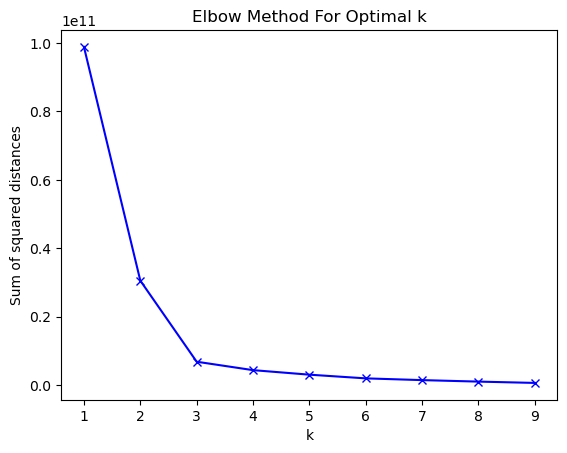

In [2]:
from sklearn.cluster import KMeans

neighborhood_prices = housing_refined[['Neighborhood', 'SalePrice']].groupby('Neighborhood').median().sort_values('SalePrice')

SS_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(neighborhood_prices)
    SS_distances.append(km.inertia_)
    

plt.plot(K, SS_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

C:\Users\immed\Programming\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


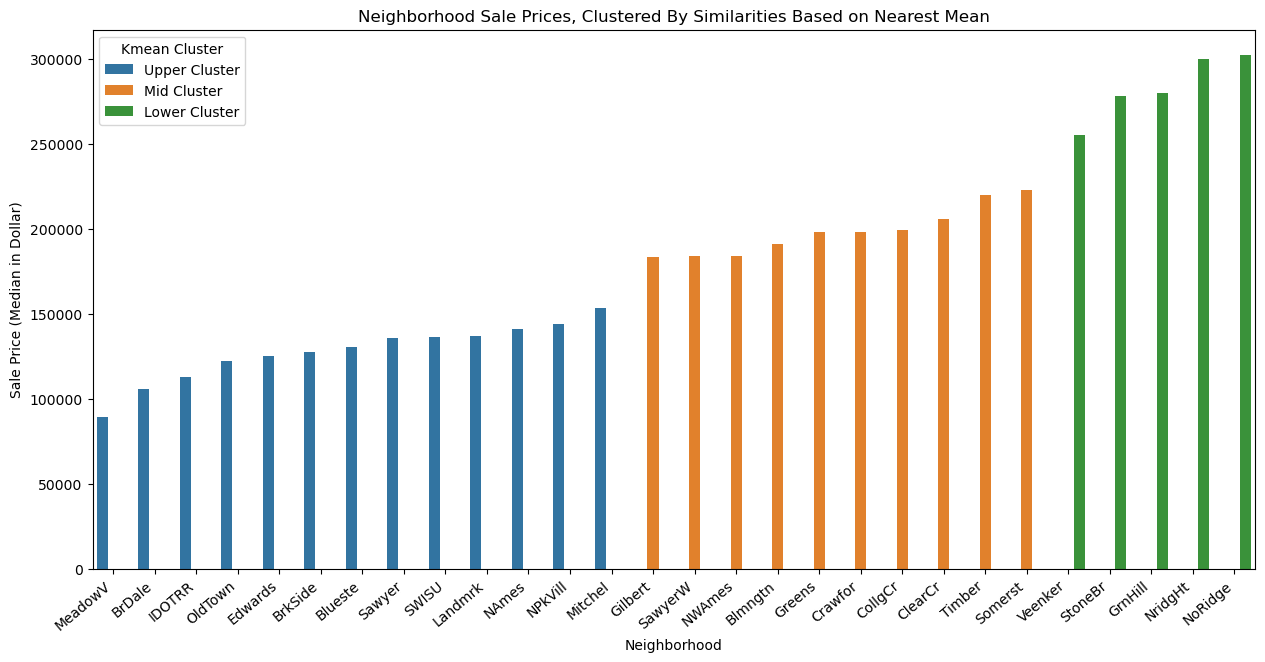

In [3]:
neighborhood_prices['Cluster'] = KMeans(n_clusters=3).fit(neighborhood_prices).labels_
neighborhood_prices['Cluster'] = neighborhood_prices['Cluster'].astype(str)
neighborhood_prices['Cluster'] = neighborhood_prices['Cluster'].str.replace('1', 'Lower Cluster')
neighborhood_prices['Cluster'] = neighborhood_prices['Cluster'].str.replace('2', 'Mid Cluster')
neighborhood_prices['Cluster'] = neighborhood_prices['Cluster'].str.replace('0', 'Upper Cluster')

plt.figure(figsize=(15,7))
ax = sns.barplot(x= neighborhood_prices.index, y=neighborhood_prices['SalePrice'], 
                 hue=neighborhood_prices['Cluster'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(ylabel='Sale Price (Median in Dollar)')
plt.title("Neighborhood Sale Prices, Clustered By Similarities Based on Nearest Mean")
ax.legend(title = "Kmean Cluster")

In [6]:
neighborhood_prices['Cluster']

Neighborhood
MeadowV    Upper Cluster
BrDale     Upper Cluster
IDOTRR     Upper Cluster
OldTown    Upper Cluster
Edwards    Upper Cluster
BrkSide    Upper Cluster
Blueste    Upper Cluster
Sawyer     Upper Cluster
SWISU      Upper Cluster
Landmrk    Upper Cluster
NAmes      Upper Cluster
NPkVill    Upper Cluster
Mitchel    Upper Cluster
Gilbert    Lower Cluster
SawyerW    Lower Cluster
NWAmes     Lower Cluster
Blmngtn    Lower Cluster
Greens     Lower Cluster
Crawfor    Lower Cluster
CollgCr    Lower Cluster
ClearCr    Lower Cluster
Timber     Lower Cluster
Somerst    Lower Cluster
Veenker      Mid Cluster
StoneBr      Mid Cluster
GrnHill      Mid Cluster
NridgHt      Mid Cluster
NoRidge      Mid Cluster
Name: Cluster, dtype: object

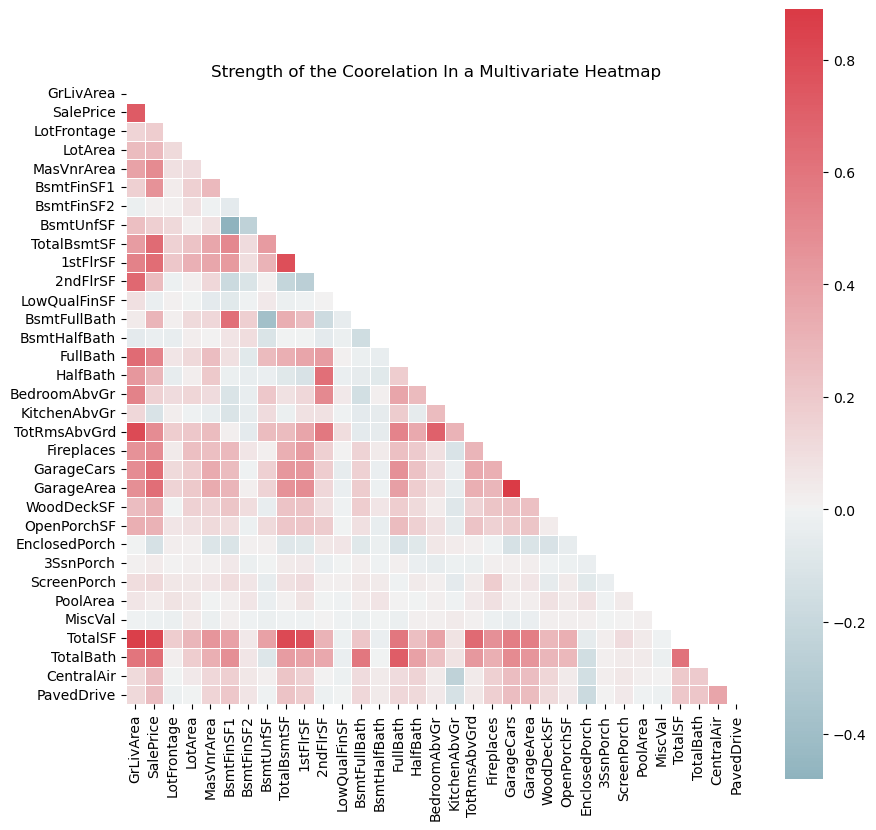

In [34]:
corr = housing_refined.corr(numeric_only=True)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap,
            center=0, square=True, linewidths = .5)
plt.title("Strength of the Coorelation In a Multivariate Heatmap")
plt.show()

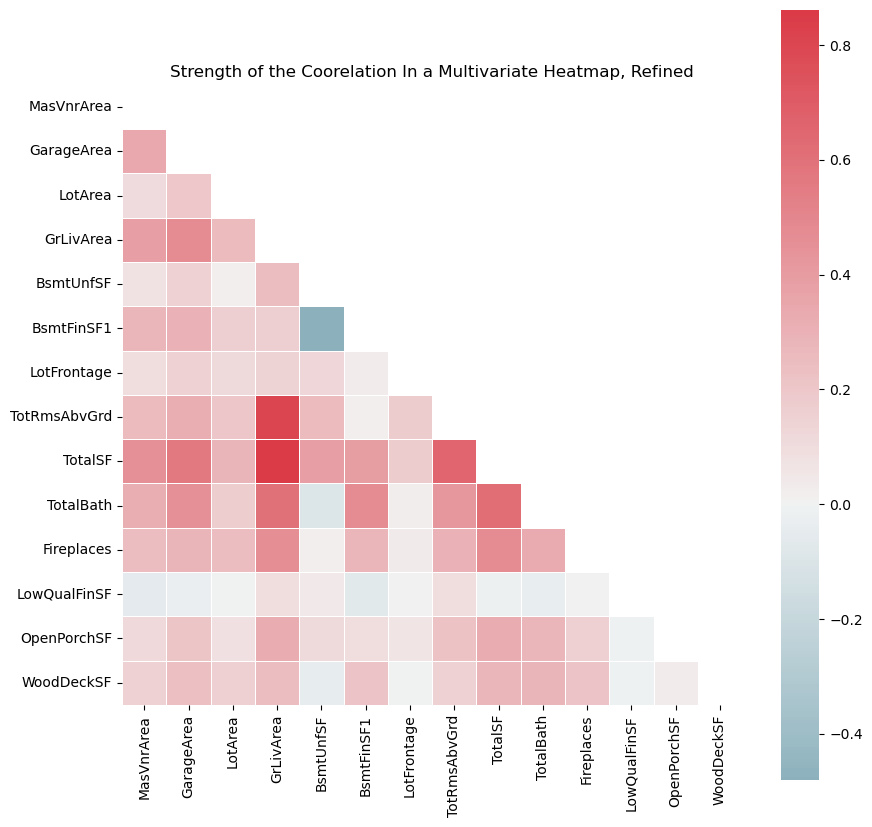

In [37]:
housing_refined = housing_refined[['MasVnrArea', 'MasVnrType', 'GarageArea', 'LotArea', 'GrLivArea', 'BsmtUnfSF', 
                           'BsmtFinSF1', 'LotFrontage', 'MoSold', 'Neighborhood', 'GarageType', 'OverallQual',
                           'TotRmsAbvGrd', 'BsmtFinType1', 'MSSubClass', 'OverallCond', 'GarageFinish', 'TotalSF',
                           'TotalBath', 'MixedExterior', 'Fireplaces', 'LowQualFinSF', 'OpenPorchSF', 'LotShape', 'WoodDeckSF']].copy()

corr = housing_refined.corr(numeric_only=True)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap,
            center=0, square=True, linewidths = .5)
plt.title("Strength of the Coorelation In a Multivariate Heatmap, Refined")
plt.show()

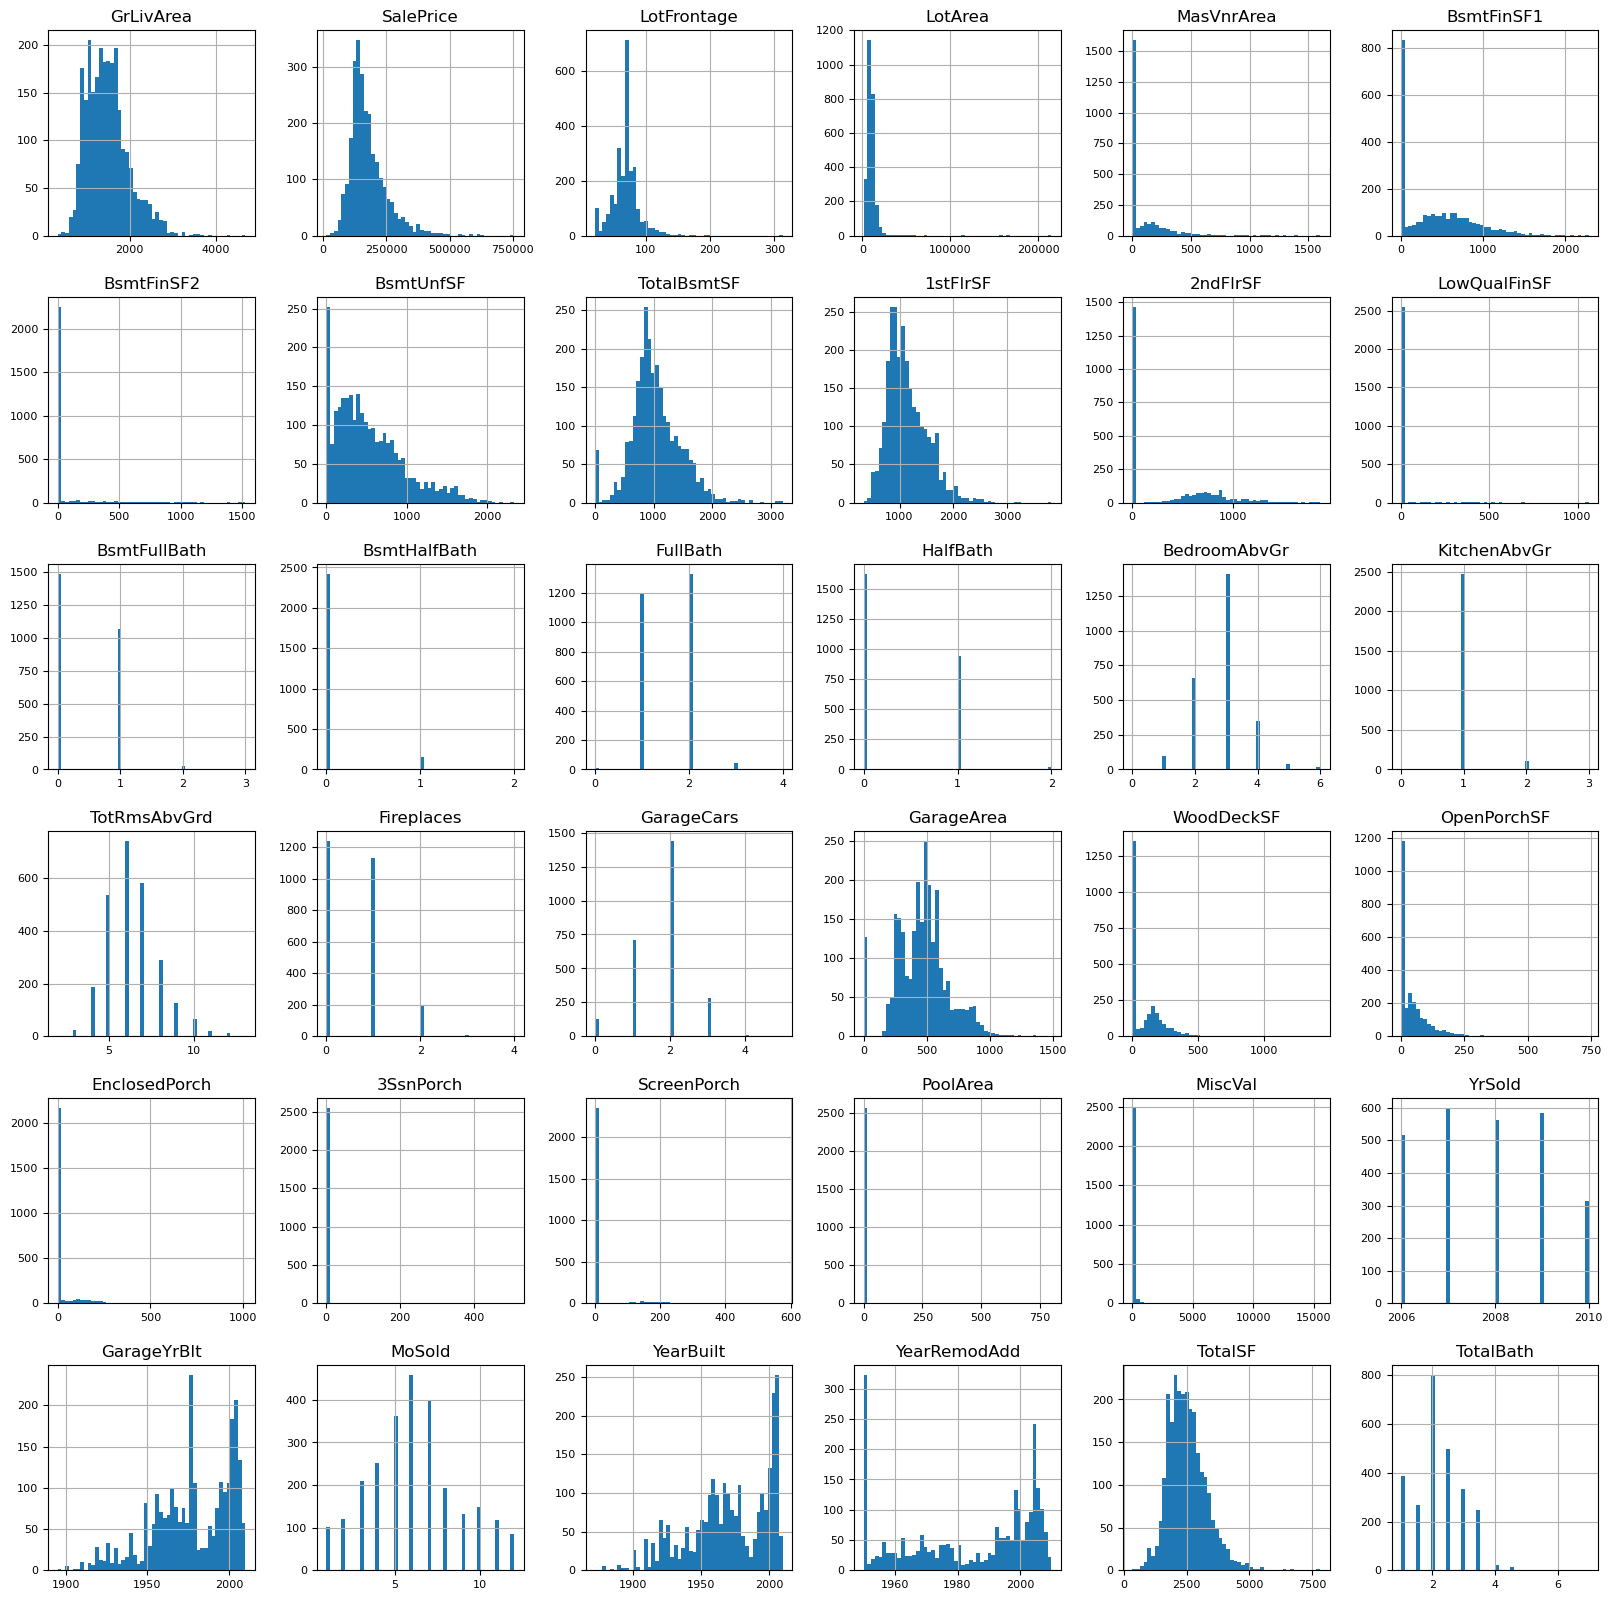

In [9]:
housing_numeric.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8);